#### License

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"> CC BY  - Creative Commons Attribution 4.0 International License</a>.

#### Preliminaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm

#### Load seismic data

This is one inline from the [F3 3D](https://terranubis.com/datainfo/Netherlands-Offshore-F3-Block-Complete) ([CC BY-SA license](https://creativecommons.org/licenses/by-sa/3.0/)).

In [2]:
data = np.loadtxt('data/f3_inline296.dat').T

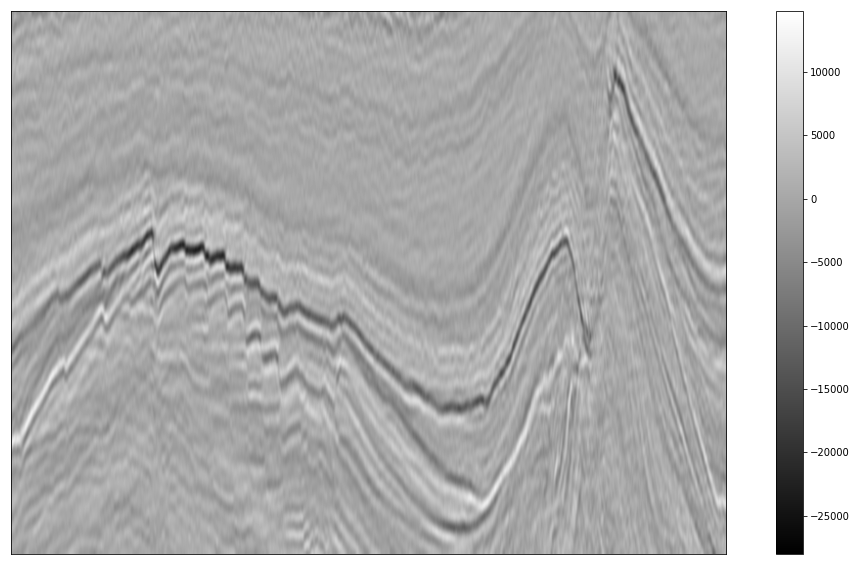

In [3]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()


#### Scaling seismic data to [-128 +128] range, centered around 0, using limits proportional to input

In [4]:
print (data.min(), data.max())

-28026.0 14817.0


In [5]:
data_n=(data-data.min())/(data.max()-data.min())

data_sc =  128*(data_n * (data.max()/abs(data.min()) - (-1)) + (-1))

print (data_n.min(), data_n.max())
print (data_sc.min(), data_sc.max())


0.0 1.0
-128.0 67.6720188396489


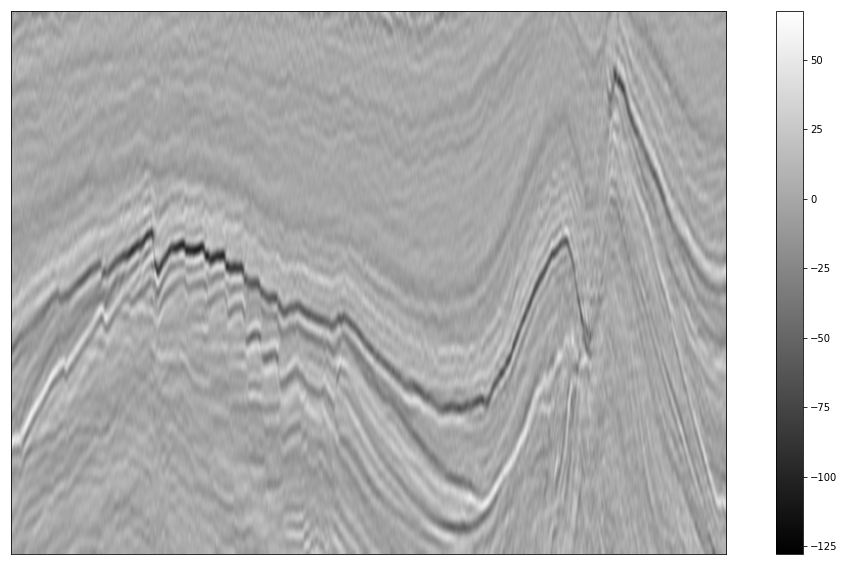

In [6]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data_sc, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()

#fig.savefig('data.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Apply sigmoid values

In [7]:
# list of sigmoid widths
ws = [-2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]

Pass ws to the sigmoid function in order to make subplots.

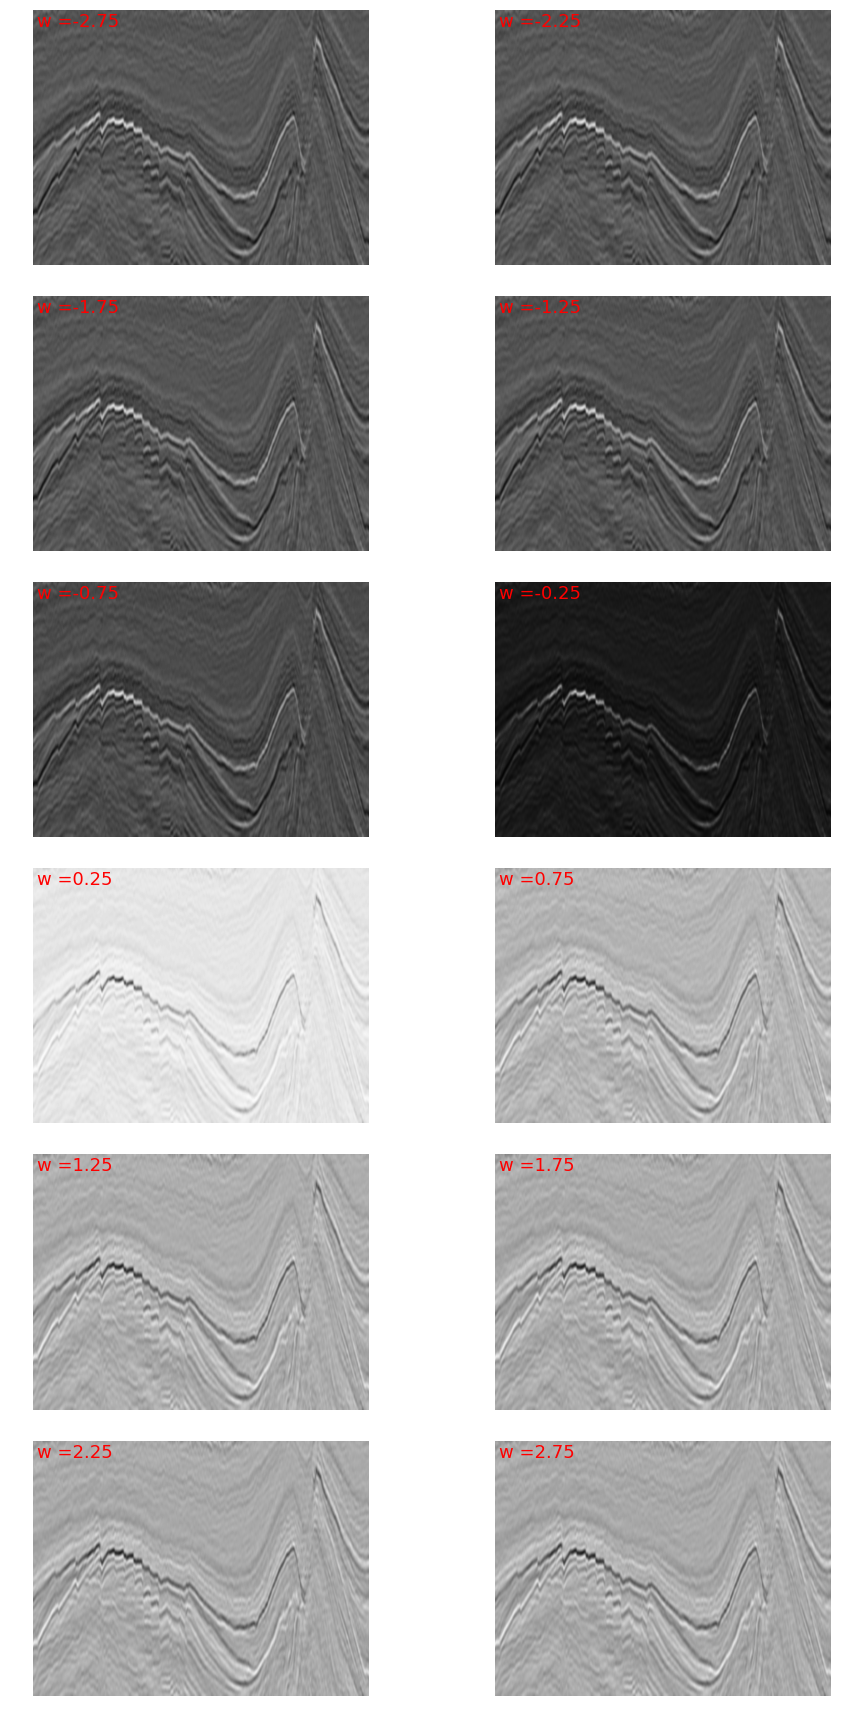

In [8]:
fig, axs = plt.subplots(6,2, figsize=(14, 24))
axs = axs.ravel()

for i, w in zip(np.arange(22), ws):
    axs[i].imshow(1 / (1 + np.exp(-data_n[:,:]/w+0.001)), cmap='gray', aspect = 4, interpolation = 'bicubic')
    axs[i].axis('off')
    axs[i].text(8, 8, 'w =' + str(w), fontsize=18, color = 'r')

plt.tight_layout()
plt.show()
